In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("advertising_data.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.size

800

In [7]:
df.shape

(200, 4)

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df['Sales']=df['Sales'].astype('float64')

In [10]:
from sklearn.impute import KNNImputer
x=df[['Sales','Radio', 'TV' , 'Newspaper']]

imputer=KNNImputer(n_neighbors=2)
x=imputer.fit_transform(x)

In [11]:
df[['Sales','Radio', 'TV' , 'Newspaper']]=pd.DataFrame(x, columns=['Sales','Radio', 'TV' , 'Newspaper'])

In [12]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
x

array([[ 22.1,  37.8, 230.1,  69.2],
       [ 10.4,  39.3,  44.5,  45.1],
       [ 12. ,  45.9,  17.2,  69.3],
       [ 16.5,  41.3, 151.5,  58.5],
       [ 17.9,  10.8, 180.8,  58.4],
       [  7.2,  48.9,   8.7,  75. ],
       [ 11.8,  32.8,  57.5,  23.5],
       [ 13.2,  19.6, 120.2,  11.6],
       [  4.8,   2.1,   8.6,   1. ],
       [ 15.6,   2.6, 199.8,  21.2],
       [ 12.6,   5.8,  66.1,  24.2],
       [ 17.4,  24. , 214.7,   4. ],
       [  9.2,  35.1,  23.8,  65.9],
       [ 13.7,   7.6,  97.5,   7.2],
       [ 19. ,  32.9, 204.1,  46. ],
       [ 22.4,  47.7, 195.4,  52.9],
       [ 12.5,  36.6,  67.8, 114. ],
       [ 24.4,  39.6, 281.4,  55.8],
       [ 11.3,  20.5,  69.2,  18.3],
       [ 14.6,  23.9, 147.3,  19.1],
       [ 18. ,  27.7, 218.4,  53.4],
       [ 17.5,   5.1, 237.4,  23.5],
       [  5.6,  15.9,  13.2,  49.6],
       [ 20.5,  16.9, 228.3,  26.2],
       [  9.7,  12.6,  62.3,  18.3],
       [ 17. ,   3.5, 262.9,  19.5],
       [ 15. ,  29.3, 142.9,  12.6],
 

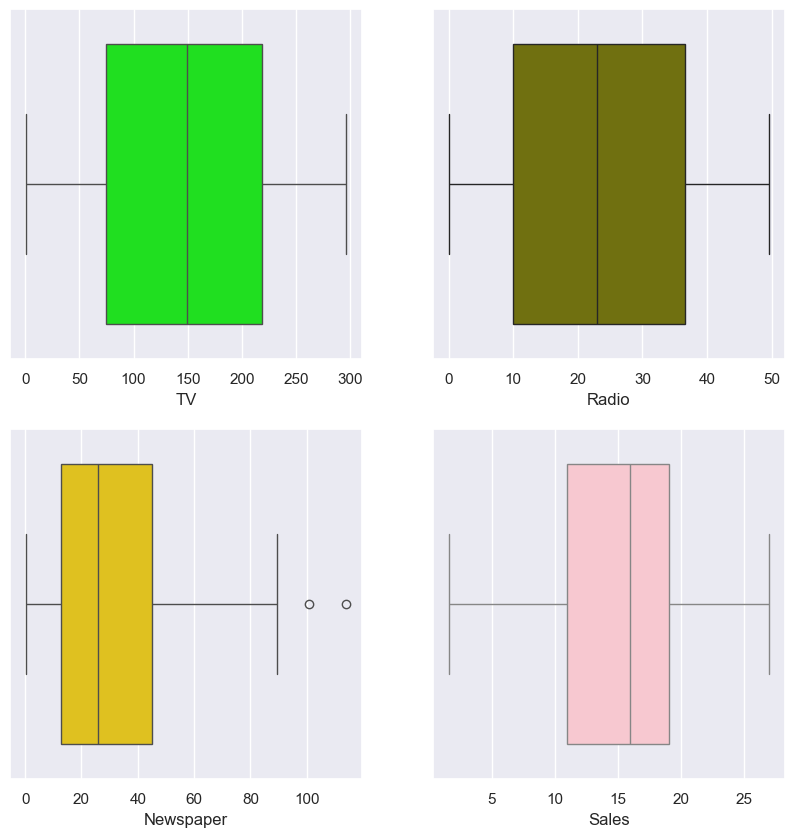

In [14]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))


sns.boxplot(data=df, x="TV", color="Lime", ax=axs[0, 0])
sns.boxplot(data=df, x="Radio", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="Newspaper", color="gold", ax=axs[1, 0])
sns.boxplot(data=df, x="Sales", color="pink", ax=axs[1, 1])
plt.show()

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

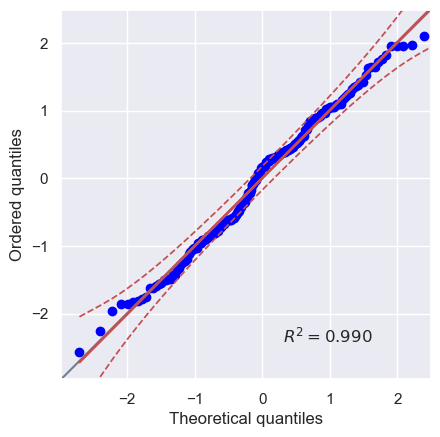

In [15]:
import pingouin as pg 
pg.qqplot(df['Sales'],dist ='norm')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

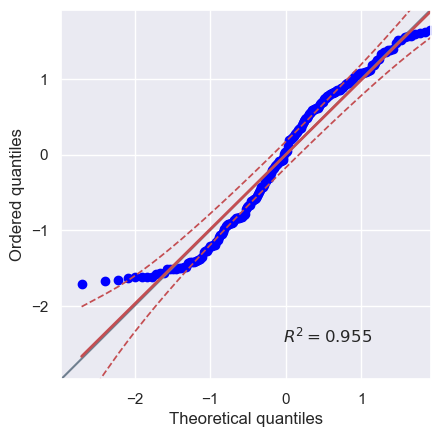

In [16]:
pg.qqplot(df['TV'],dist ='norm')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

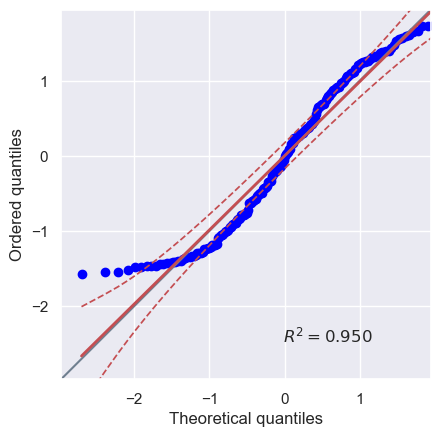

In [17]:
pg.qqplot(df['Radio'],dist ='norm')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

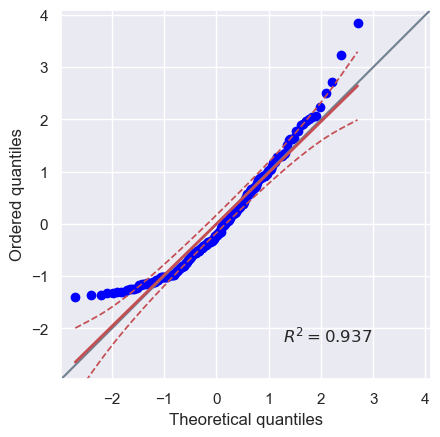

In [18]:
pg.qqplot(df['Newspaper'],dist ='norm')

In [19]:
df.select_dtypes(include=['object']).columns.tolist()

[]

Text(0.5, 1.0, 'Sales vs Radio')

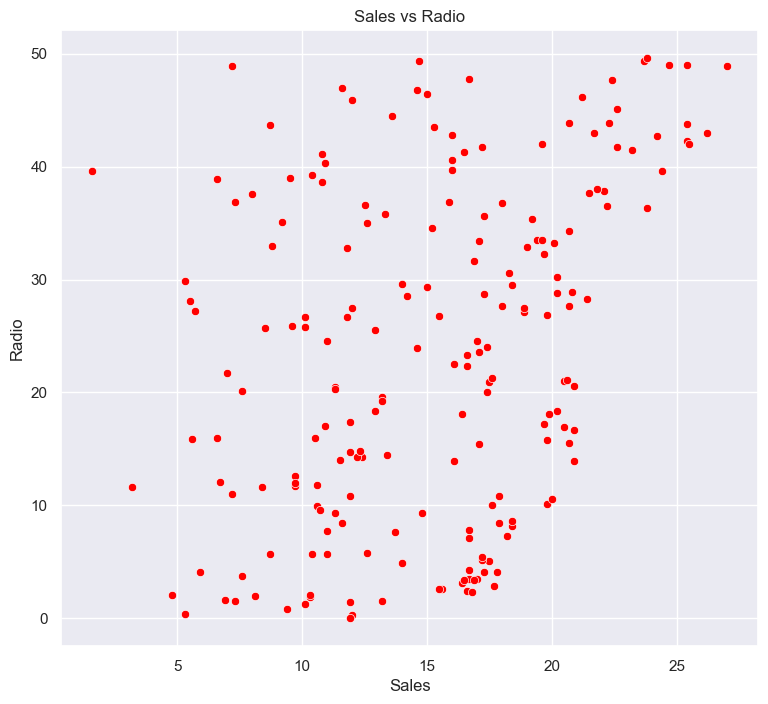

In [20]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df,x="Sales",y="Radio",color="Red")
plt.title("Sales vs Radio")

Text(0.5, 1.0, 'Sales vs TV')

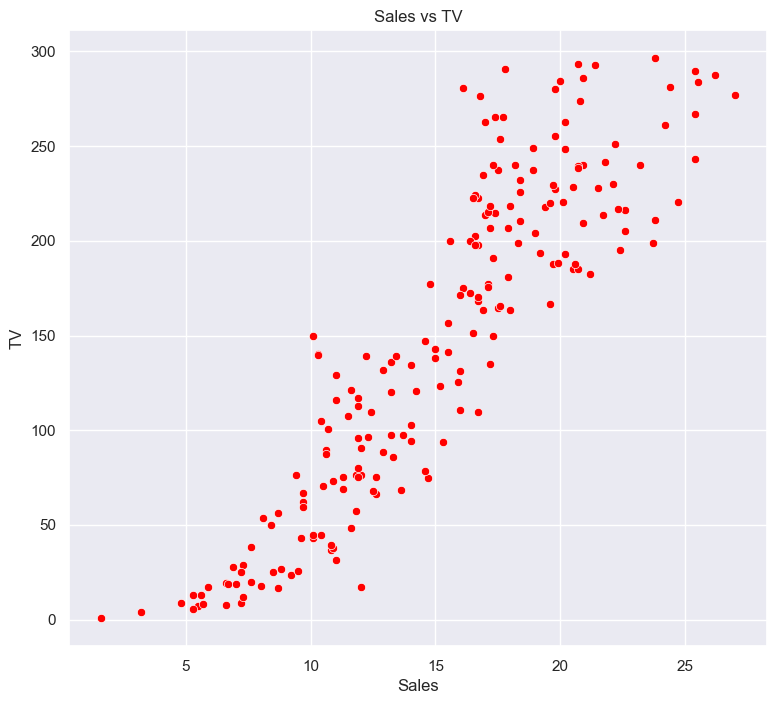

In [21]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df,x="Sales",y="TV",color="Red")
plt.title("Sales vs TV")

Text(0.5, 1.0, 'Sales vs Newspaper')

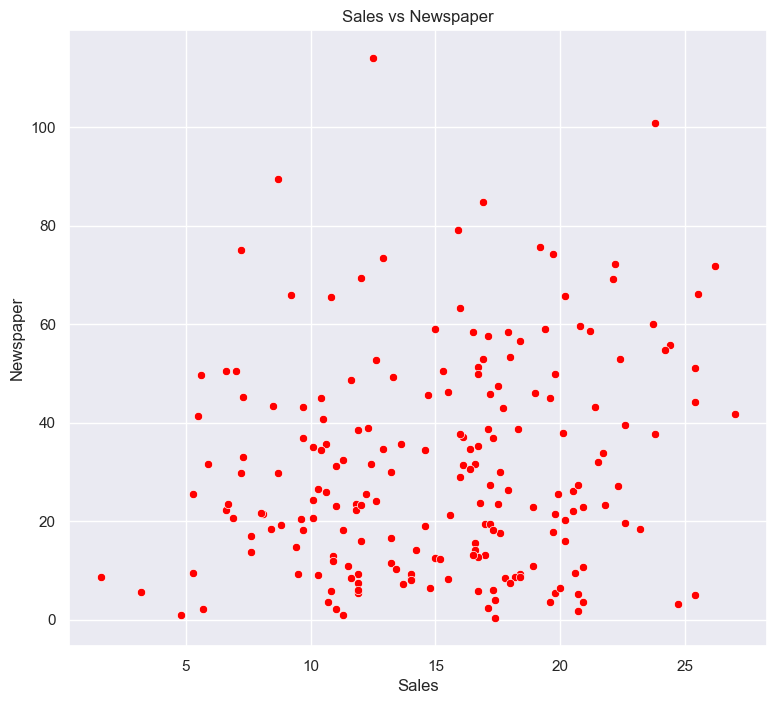

In [22]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df,x="Sales",y="Newspaper",color="Red")
plt.title("Sales vs Newspaper")

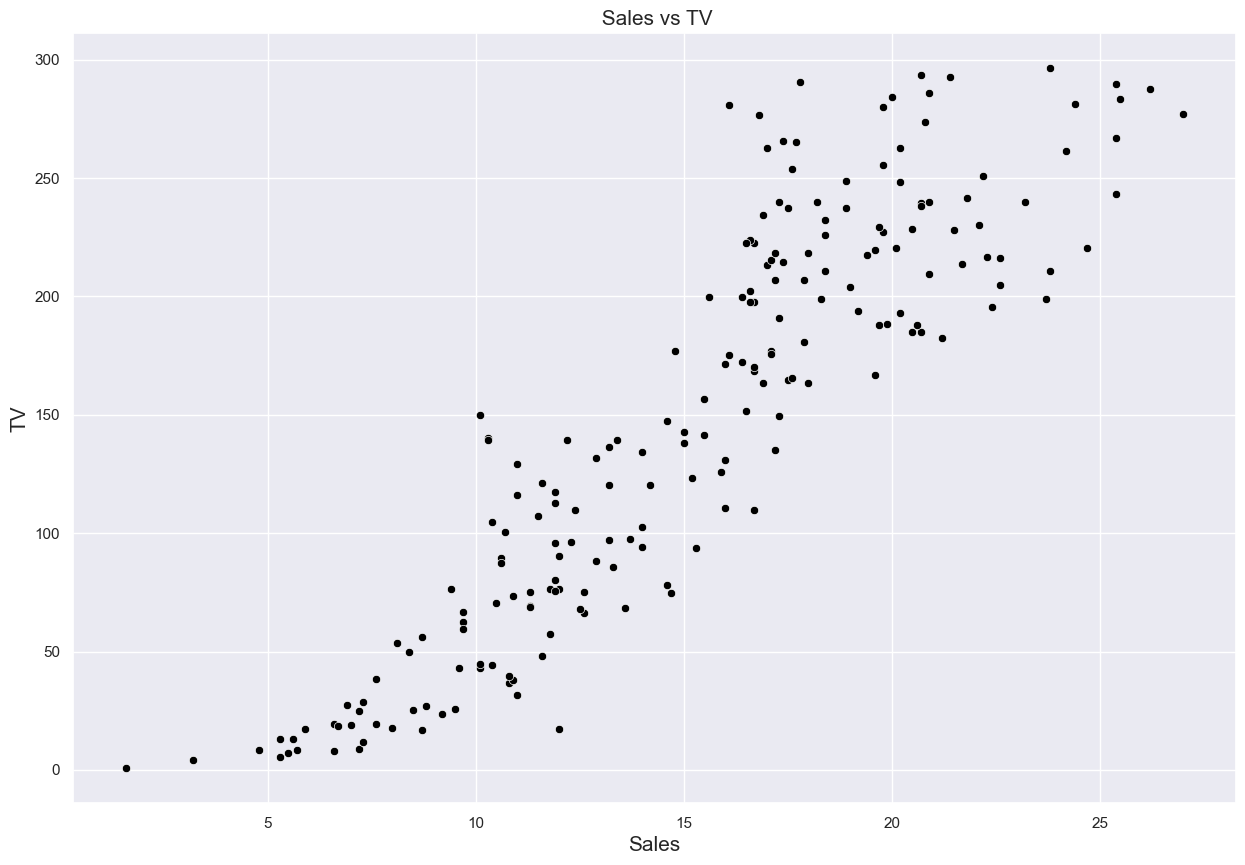

In [23]:
plt.figure(figsize=(15,10))
plt.xlabel('Sales',fontsize=15)
plt.ylabel('TV',fontsize=15)
plt.title(' Sales vs TV',fontsize=15)
sns.scatterplot(x=df['Sales'],y=df['TV'],color='black')
plt.show()

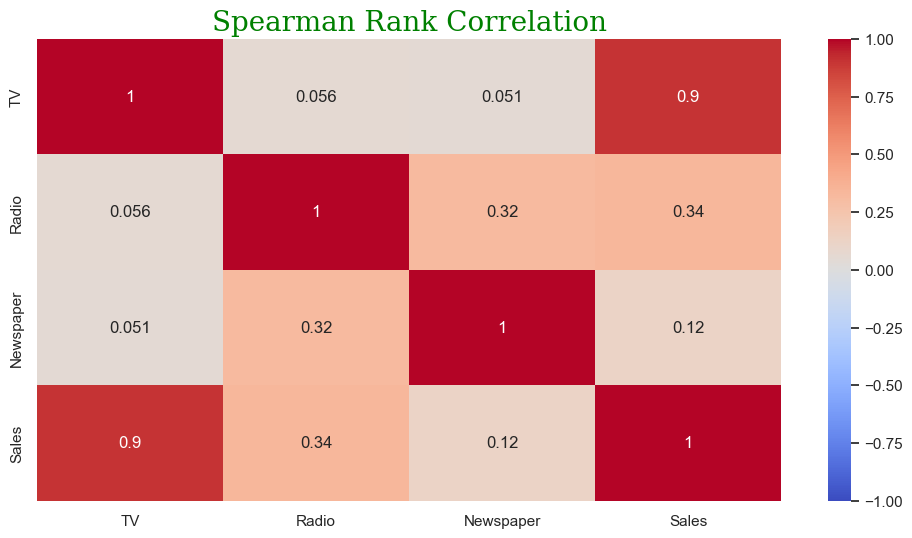

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("advertising_data.csv")


df_numeric = df.select_dtypes(include="number")


corr = df_numeric.corr(method='spearman')


plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

font_title = {
    'family': 'serif',
    'color': 'green',
    'size': 20
}

plt.title("Spearman Rank Correlation", fontdict=font_title)
plt.show()

In [25]:
 df_numeric = df.select_dtypes(include='number')
df_numeric.corr(method='spearman')*100

,TV,Radio,Newspaper,Sales
TV,100.000000,5.612339,5.083973,90.099564
Radio,5.612339,100.000000,31.697949,33.994909
Newspaper,5.083973,31.697949,100.000000,12.302741
Sales,90.099564,33.994909,12.302741,100.000000


In [26]:
dff = df.drop(columns=['Sales','Radio', 'TV' , 'Newspaper'])
dff.head()

""
0
1
2
3
4


In [27]:
Q1=dff.quantile(0.25).round(3)
Q3=dff.quantile(0.75).round(3)
IQR= Q3-Q1
print(IQR)

Series([], dtype: float64)


In [28]:
dfout=dff[~((dff<(Q1-1.5 * IQR)) | (dff> (Q3+1.5 * IQR))).any (axis=1)]
dfout.shape

(200, 0)

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

x = np.random.rand(100, 4)  
y = np.random.randint(0, 2, 100)  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [30]:
x_train

array([[7.63441810e-01, 1.73283012e-01, 7.50990208e-01, 8.61647360e-01],
       [3.04050439e-01, 9.71881490e-01, 2.82768951e-01, 8.32572599e-01],
       [1.66848042e-01, 5.55133092e-01, 9.87579982e-01, 5.34099858e-01],
       [4.71370190e-01, 8.67645027e-01, 2.15603053e-01, 6.70919333e-01],
       [8.43840743e-01, 8.96112585e-01, 5.16487617e-01, 3.82610306e-01],
       [5.77593715e-01, 8.30618593e-01, 3.27985497e-01, 5.21401646e-01],
       [9.78491077e-01, 5.04879648e-01, 6.55429797e-01, 7.07330614e-01],
       [4.50899411e-01, 2.07230833e-01, 9.33080777e-01, 1.27982378e-01],
       [2.95903245e-01, 2.40815058e-01, 6.42914201e-01, 4.28142803e-01],
       [1.60654724e-02, 7.14011052e-01, 5.73037366e-01, 4.85300430e-01],
       [4.78208281e-01, 2.19349525e-01, 4.49694835e-01, 4.68876030e-01],
       [5.40999467e-01, 3.63506490e-01, 6.18392861e-01, 4.93897868e-01],
       [5.45234381e-01, 5.45874535e-01, 1.34667143e-02, 3.56154427e-01],
       [7.24436070e-01, 6.52362321e-01, 5.36037037e

In [31]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train=sc.fit_transform(x_train)

x_test= sc.transform(x_test)

In [32]:
x_train

array([[ 0.86356401, -1.32193849,  0.96373361,  1.49965114],
       [-0.77385823,  1.64616716, -0.80373874,  1.38776895],
       [-1.26289279,  0.09726204,  1.85682822,  0.23922013],
       [-0.1774755 ,  1.25875741, -1.05728098,  0.76571325],
       [ 1.1501323 ,  1.36456117,  0.07851783, -0.34372473],
       [ 0.20114015,  1.12114336, -0.63305235,  0.19035631],
       [ 1.63007047, -0.08951209,  0.60300589,  0.905827  ],
       [-0.2504401 , -1.19576655,  1.65110104, -1.32355494],
       [-0.80289752, -1.07094596,  0.5557612 , -0.16851176],
       [-1.80033156,  0.68775473,  0.29198553,  0.05143572],
       [-0.15310229, -1.15072569, -0.17361595, -0.01176679],
       [ 0.07070619, -0.61494568,  0.46319644,  0.0845194 ],
       [ 0.08580082,  0.06285128, -1.82031851, -0.44552923],
       [ 0.7245347 ,  0.45862839,  0.15231426, -1.23114135],
       [-1.26009129,  0.51385649, -0.35951497,  0.2530314 ],
       [-0.26580925,  0.91958044, -0.08811649,  2.00930719],
       [-1.47998103, -0.

In [33]:
x_test

array([[ 0.42356213, -0.2594038 , -0.0136358 , -1.10633951],
       [ 1.69730919, -0.0748761 , -1.05209628,  1.00035024],
       [-1.05766031, -0.85769666,  1.33889938,  0.00636485],
       [ 1.24965838,  0.12420385,  1.51502812, -0.22000937],
       [-0.64147343, -1.24509049,  0.77939614,  0.42340977],
       [-1.08779403, -1.53670601,  0.87688759,  1.23862309],
       [ 1.24008149,  1.22573539, -1.13574581,  0.40471207],
       [ 1.32824061, -0.9573073 ,  1.37022512,  1.00283369],
       [ 0.07210956, -0.32272516, -1.28728517, -1.67933871],
       [ 1.28396999,  0.86344561, -0.14548785,  0.75221389],
       [ 0.77128795, -1.22445494, -1.30541989,  1.28179702],
       [ 1.13073747,  1.12231006,  1.26743172,  0.24066712],
       [ 0.55048547,  0.84898534, -1.4732353 ,  0.71914825],
       [ 0.70796866,  0.5681906 , -0.29942109,  0.7022649 ],
       [ 0.91667794, -1.1879435 , -1.23270248, -0.3803349 ],
       [-0.37724261, -1.34269447, -1.10041753, -0.68515995],
       [ 0.84721847,  0.

In [34]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np  

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

y_pred_lr = model_lr.predict(x_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test))  
accuracy_lr = 100 * (1 - mape_lr)          

print('Linear Regression metrics:')  
print('Mean Absolute error (MAE):', mae_lr)  
print('Mean Squared Error (MSE):', mse_lr)  
print("Root Mean Squared Error(RMSE):", rmse_lr)  
 
print("Accuracy:", round(accuracy_lr, 2))  

Linear Regression metrics:
Mean Absolute error (MAE): 0.502705065496158
Mean Squared Error (MSE): 0.2596726570030381
Root Mean Squared Error(RMSE): 0.5095808640471482
Accuracy: -inf


/var/folders/d4/j7k55b31533djc626nh658gc0000gn/T/ipykernel_12876/3429057860.py:13: RuntimeWarning: divide by zero encountered in divide
  mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test))


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
accuracy_lr = 100 * (1 - mape)

print('Mean Absolute error (MAE):', mae)  
print('Mean Squared Error (MSE):', mse)  
print("Root Mean Squared Error(RMSE):", rmse)  
print("Mean Absolute Percentage Error (MAPE):", round(mape * 100, 2))  
print("Accuracy:", round(accuracy_lr, 2))

Mean Absolute error (MAE): 0.5
Mean Squared Error (MSE): 0.5
Root Mean Squared Error(RMSE): 0.7071067811865476
Mean Absolute Percentage Error (MAPE): nan
Accuracy: nan


/var/folders/d4/j7k55b31533djc626nh658gc0000gn/T/ipykernel_12876/2893868570.py:13: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
/var/folders/d4/j7k55b31533djc626nh658gc0000gn/T/ipykernel_12876/2893868570.py:13: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)


y_pred_rf = model_rf.predict(x_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = np.mean(np.abs((y_test-y_pred_rf)/ np.abs(y_test)))  
accuracy_rf = 100 * (1 - mape_rf)


print('Random Forest Metrics : ')           
print('Mean Absolute error (MAE):', mae_rf)  
print('Mean Squared Error (MSE):', mse_rf)  
print("Root Mean Squared Error(RMSE):", rmse_rf)  
print("Mean Absolute Percentage Error (MAPE):", round(mape_rf * 100, 2))  


Random Forest Metrics : 
Mean Absolute error (MAE): 0.5426666666666667
Mean Squared Error (MSE): 0.32696000000000003
Root Mean Squared Error(RMSE): 0.5718041622793595
Mean Absolute Percentage Error (MAPE): inf


/var/folders/d4/j7k55b31533djc626nh658gc0000gn/T/ipykernel_12876/554734201.py:16: RuntimeWarning: divide by zero encountered in divide
  mape_rf = np.mean(np.abs((y_test-y_pred_rf)/ np.abs(y_test)))


In [37]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / np.abs(y_test)))

accuracy_xgb = 100 * (1 - mape_xgb)

print('XGBoost Metrics : ')           
print('Mean Absolute error (MAE):', mae_xgb)  
print('Mean Squared Error (MSE):', mse_xgb)  
print("Root Mean Squared Error(RMSE):", rmse_xgb)  
print("Mean Absolute Percentage Error (MAPE):", round(mape_xgb * 100, 2))  
print("Accuracy:", round(accuracy_xgb, 2))


XGBoost Metrics : 
Mean Absolute error (MAE): 0.5192502737045288
Mean Squared Error (MSE): 0.35563069581985474
Root Mean Squared Error(RMSE): 0.5963477976985031
Mean Absolute Percentage Error (MAPE): inf
Accuracy: -inf


/var/folders/d4/j7k55b31533djc626nh658gc0000gn/T/ipykernel_12876/679414474.py:12: RuntimeWarning: divide by zero encountered in divide
  mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / np.abs(y_test)))


In [38]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression  
import numpy as np 
model = LinearRegression()
ssplit = ShuffleSplit(n_splits=10, test_size=0.30)

results = cross_val_score(model, x, y, cv=ssplit)  
print(results)
print("\nMean Cross-validation Accuracy:", np.mean(results))



[-0.28424892 -0.31883257 -0.05530861 -0.10674611 -0.16470944 -0.32532902
 -0.04391657 -0.24508782 -0.05142808 -0.38367685]

Mean Cross-validation Accuracy: -0.1979283991350995


In [39]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression  
import numpy as np 
model = DecisionTreeRegressor(max_depth=3)
ssplit = ShuffleSplit(n_splits=10, test_size=0.30)

results = cross_val_score(model, x, y, cv=ssplit)  
print(results)
print("\nMean Cross-validation Accuracy:", np.mean(results))

[-0.31568222 -0.76596162 -0.79940632 -0.17773803 -0.23311895 -0.5856513
 -0.37698567 -0.23296897 -1.11157559 -0.2798426 ]

Mean Cross-validation Accuracy: -0.48789312662902107


In [40]:
model=DecisionTreeRegressor(max_depth=3)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:",np.mean(results))

[-0.56326171 -0.70036129 -0.27764026 -0.67103384 -0.09709555 -0.22913832
 -0.35484143 -0.60496987 -0.53766736 -0.63626363]

Mean Cross-validation Accuracy: -0.46722732789871024


In [41]:
model=RandomForestRegressor(random_state=5)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print("\nMean Cross-validation Accuracy:",np.mean(results))

[-0.24767857 -0.22572398 -0.1004     -0.28041667 -0.23445982 -0.17261244
 -0.34818056 -0.49596833 -0.34491866 -0.12161111]

Mean Cross-validation Accuracy: -0.25719701343612533


In [42]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


ssplit = ShuffleSplit(n_splits=10, test_size=0.3)


results_xgb = cross_val_score(model_xgb, x, y, cv=ssplit)


print("Cross-validation results for each fold:")
print(results_xgb)

print("\nMean Cross-validation Accuracy:", np.mean(results_xgb))

Cross-validation results for each fold:
[-0.55257332 -0.44636941 -0.30203056 -0.7667737  -0.7039932  -0.43613911
 -0.77159417 -0.25658858 -0.37974906 -0.6153965 ]

Mean Cross-validation Accuracy: -0.5231207609176636
